#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Alejandro Pimentel </font>

##### <font color="#03997A"> Modulo 6 Aprendizaje de Maquina supervisado </font>

##### <font color="#03997A">Practica 4: Aplicacion de modelos Decision Tree Regression con el data set de propinas Ibarra Ramírez Sergio </font>

Primero importamos los datos de propinas 

In [1]:
import seaborn as sns

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Vamos a dividir los datos en variables independientes y dependiente así como train y test 

In [2]:
import pandas as pd


from sklearn.model_selection import train_test_split

# AQUI SEPARO DEPENDIENTE DE INDEPENDIENTES
y = tips["tip"] 
X = tips.drop(["tip"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2023)

Vamos a hacer encodigng the las variables categoricas  para eso primero separamos las variables categoricas 

In [3]:
X_train_categoricas = X_train.drop(["total_bill", "size"],axis=1)
X_train_categoricas

,sex,smoker,day,time
158,Female,No,Sun,Dinner
186,Female,Yes,Sun,Dinner
21,Female,No,Sat,Dinner
74,Female,No,Sat,Dinner
43,Male,No,Sun,Dinner
...,...,...,...,...
161,Male,No,Sun,Dinner
183,Male,Yes,Sun,Dinner
198,Female,Yes,Thur,Lunch
25,Male,No,Sat,Dinner


In [4]:
X_train_continuas = X_train[["total_bill", "size"]]
X_train_continuas

,total_bill,size
158,13.39,2
186,20.90,3
21,20.29,2
74,14.73,2
43,9.68,2
...,...,...
161,12.66,2
183,23.17,4
198,13.00,2
25,17.81,4


In [6]:
X_test_categoricas = X_test.drop(["total_bill", "size"],axis=1)
X_test_categoricas.head()

,sex,smoker,day,time
154,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
30,Male,No,Sat,Dinner
75,Male,No,Sat,Dinner
33,Female,No,Sat,Dinner


In [7]:
X_test_categoricas.shape

(49, 4)

In [8]:
X_test_continuas = X_test[["total_bill", "size"]]
X_test_continuas.head()

,total_bill,size
154,19.77,4
4,24.59,4
30,9.55,2
75,10.51,2
33,20.69,4


Vamos a hacer encodigng the las variables caegoricas con defaultdict(preprocessing.LabelEncoder), para ello Importamos preprocessing  de sklearn

In [9]:
from collections import defaultdict
from sklearn import preprocessing 

Definimos el objeto codificador (Label_encoder)

In [10]:
Label_encoder = defaultdict(preprocessing.LabelEncoder)
Label_encoder

defaultdict(sklearn.preprocessing._label.LabelEncoder, {})

Aplicamos el objeto a las variables X_train_para_encode a codificar 

In [11]:
X_train_label_encode = X_train_categoricas.apply(lambda x: Label_encoder[x.name].fit_transform(x))
X_train_label_encode

,sex,smoker,day,time
158,0,0,2,0
186,0,1,2,0
21,0,0,1,0
74,0,0,1,0
43,1,0,2,0
...,...,...,...,...
161,1,0,2,0
183,1,1,2,0
198,0,1,3,1
25,1,0,1,0


In [12]:
X_test_label_encode = X_test_categoricas.apply(lambda x: Label_encoder[x.name].fit_transform(x))
X_test_label_encode.head()

,sex,smoker,day,time
154,1,0,2,0
4,0,0,2,0
30,1,0,1,0
75,1,0,1,0
33,0,0,1,0


Debemos "pegar las variables continuas (en este caso son size & total_bill) al df de variables categoricas para tener un df ya final de entrnemaiento y de test"

In [13]:
import pandas as pd

# Assuming X_train_para_encode and X_train_continuas are your two DataFrames

# Concatenate the DataFrames horizontally
X_train_label_encoded_aplicado = pd.concat([X_train_label_encode, X_train_continuas], axis=1)
X_train_label_encoded_aplicado


,sex,smoker,day,time,total_bill,size
158,0,0,2,0,13.39,2
186,0,1,2,0,20.90,3
21,0,0,1,0,20.29,2
74,0,0,1,0,14.73,2
43,1,0,2,0,9.68,2
...,...,...,...,...,...,...
161,1,0,2,0,12.66,2
183,1,1,2,0,23.17,4
198,0,1,3,1,13.00,2
25,1,0,1,0,17.81,4


In [14]:
import pandas as pd

# Assuming X_train_para_encode and X_train_continuas are your two DataFrames

# Concatenate the DataFrames horizontally
X_test_label_encoded_aplicado = pd.concat([X_test_label_encode, X_test_continuas], axis=1)
X_test_label_encoded_aplicado.head()


,sex,smoker,day,time,total_bill,size
154,1,0,2,0,19.77,4
4,0,0,2,0,24.59,4
30,1,0,1,0,9.55,2
75,1,0,1,0,10.51,2
33,0,0,1,0,20.69,4


Intentamos aplicar el árbol DecisionTreeRegressor con las variables predictoras ya codificadas en X_train_para_encode para .fit o entrenar el modelo y en X_test_para_encode para testear el modelo 

In [16]:
from sklearn.tree import DecisionTreeRegressor
# Create and fit the decision tree regressor model
arbol_label_encoded = DecisionTreeRegressor(min_samples_leaf=7)
arbol_label_encoded.fit(X_train_label_encoded_aplicado, y_train)

# Make predictions on the test data
y_predH_arbol_arbol_label_encoded = arbol_label_encoded.predict(X_test_label_encoded_aplicado)

y_predH_arbol_arbol_label_encoded


array([2.56      , 3.855     , 1.65666667, 1.65666667, 3.59285714,
       1.30142857, 3.335     , 2.04285714, 2.0725    , 3.52375   ,
       5.954     , 2.0725    , 3.335     , 3.855     , 2.17125   ,
       1.30142857, 3.59285714, 2.0725    , 3.52375   , 3.52375   ,
       2.0725    , 3.335     , 3.26285714, 4.76181818, 2.5075    ,
       4.76181818, 2.04285714, 3.52375   , 3.52375   , 2.79857143,
       2.195     , 2.738     , 2.195     , 2.195     , 2.195     ,
       1.65666667, 2.0725    , 1.30142857, 2.79857143, 3.335     ,
       2.553     , 3.265     , 2.553     , 2.56      , 2.735     ,
       3.855     , 2.0725    , 4.76181818, 2.735     ])

Vamos a  visualizar el arbol arbol_variables_encoded

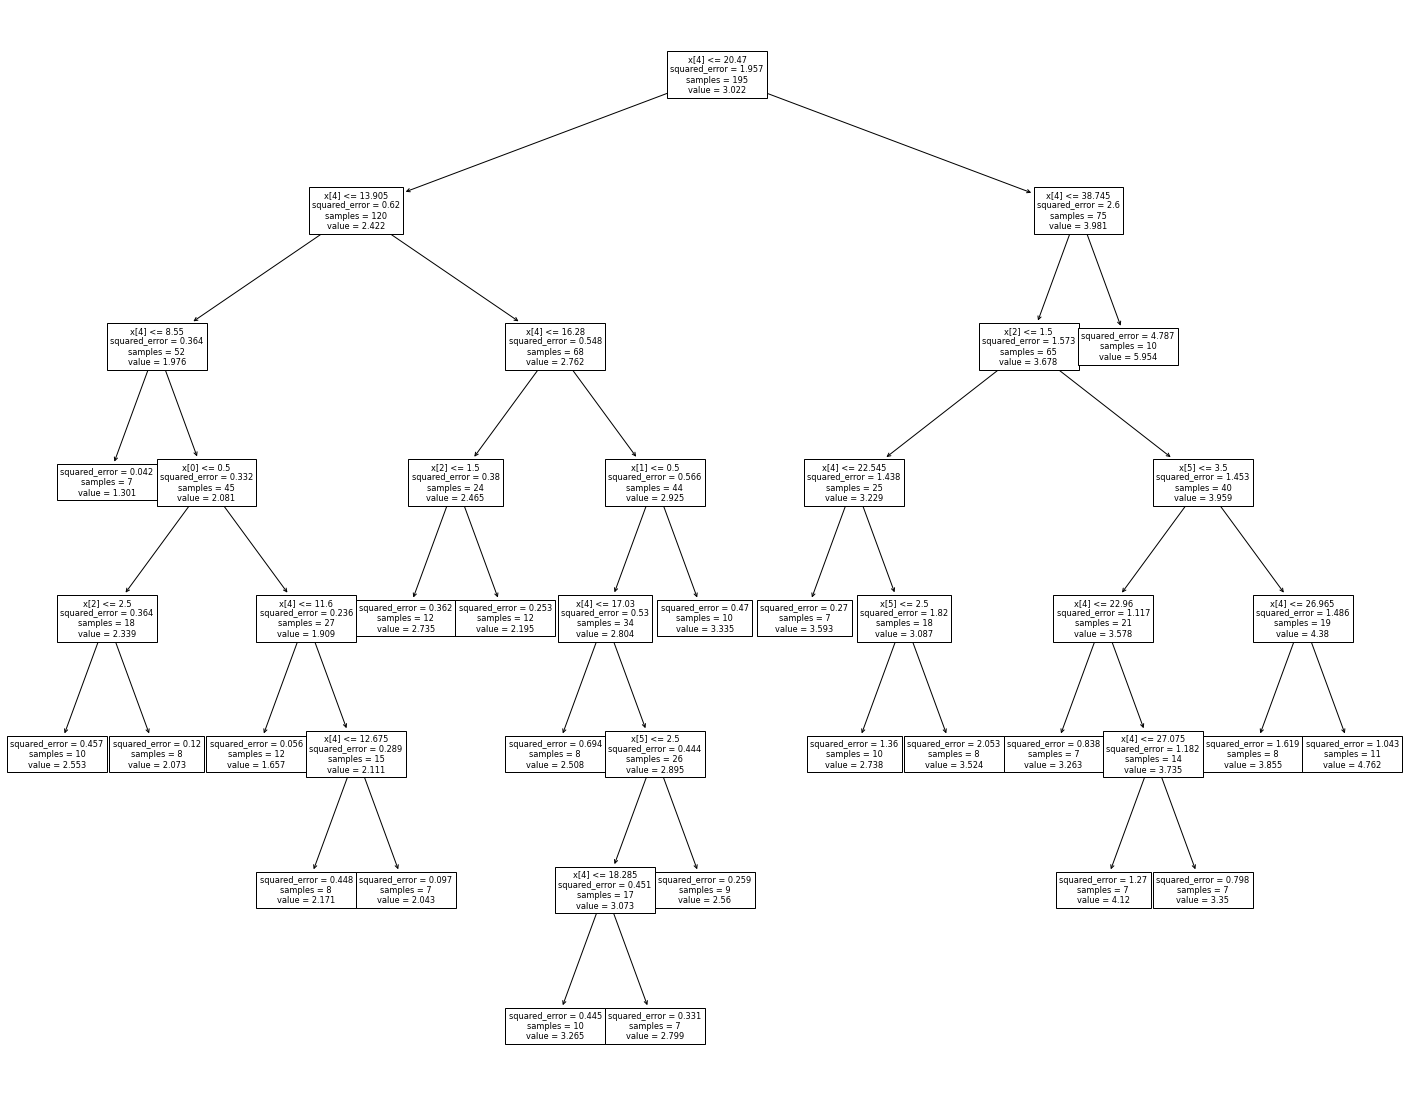

In [17]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(25,20))
tree.plot_tree(arbol_label_encoded)
plt.show()

Vamos evaluar el error de pronóstico 

In [18]:
from sklearn.metrics import mean_squared_error
RMSE_arbol_label_encoded = mean_squared_error(y_test,y_predH_arbol_arbol_label_encoded,squared=False)
print(RMSE_arbol_label_encoded)

1.0697621429114184


In [19]:
from sklearn.metrics import mean_absolute_percentage_error

# Assuming you have already obtained the predictions in y_pred and the true values in y_test
mape_arbol_label_encoded = mean_absolute_percentage_error(y_test,y_predH_arbol_arbol_label_encoded)
print("MAPE:", mape_arbol_label_encoded)

MAPE: 0.25972745957645277


Vamos a hacer un loop para diferentes valores de min_samples_leaf_values y los valores encoded 

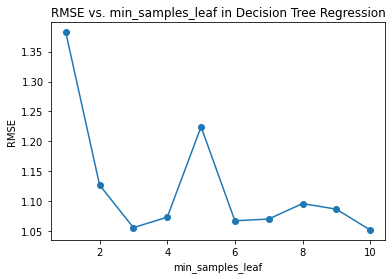

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define the range of max_depth values
min_samples_leaf_values = np.arange(1, 11)

# Initialize an empty list to store the RMSE values
rmse_values = []

# Loop through each max_depth value
for min_samples_leaf in min_samples_leaf_values:
    # Define the Decision Tree regression model
    # Hojas
    arbolH = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
    
    # Fit the model to the training data
    arbolH.fit(X_train_label_encoded_aplicado, y_train)
    
    # Make predictions on the test data
    y_predH = arbolH.predict(X_test_label_encoded_aplicado)
    
    # Calculate the RMSE
    rmse = mean_squared_error(y_test, y_predH, squared=False)
    
    # Append the RMSE value to the list
    rmse_values.append(rmse)

# Plot the RMSE values against the max_depth values
plt.plot(min_samples_leaf_values, rmse_values, marker='o')
plt.xlabel('min_samples_leaf')
plt.ylabel('RMSE')
plt.title('RMSE vs. min_samples_leaf in Decision Tree Regression')
plt.show()

#### Usemos ahora otro método de encoding(OneHotEncoder) para tratar a las variables categoricas 

In [23]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False)

In [24]:
X_train_encode_OneHot = encoder.fit_transform(X_train_categoricas)
X_train_encode_OneHot

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 0., 1.]])

Transformamos X_train_encode_OneHota un tipo de dato DataFrame

In [25]:
# Convert X_train_encode_OneHot to a DataFrame
X_train_encode_OneHot = pd.DataFrame(X_train_encode_OneHot)
X_train_encode_OneHot

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
190,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
191,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
192,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
193,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Vamos a 'resetear' los indices de ambos df para hacer un pd.concat 

In [26]:
X_train_encode_OneHot = X_train_encode_OneHot.reset_index(drop=True)
X_train_continuas = X_train_continuas.reset_index(drop=True)


In [27]:
X_train_encode_OneHot_aplicado = pd.concat([X_train_encode_OneHot, X_train_continuas], axis=1)
X_train_encode_OneHot_aplicado

,0,1,2,3,4,5,6,7,8,9,total_bill,size
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,13.39,2
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,20.90,3
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,20.29,2
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,14.73,2
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,9.68,2
...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,12.66,2
191,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,23.17,4
192,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,13.00,2
193,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,17.81,4


Debemos reemplazar todos los valres NaN por ceros 

In [54]:
X_train_encode_OneHot_aplicado = X_train_encode_OneHot_aplicado.fillna(0)
X_train_encode_OneHot_aplicado


,0,1,2,3,4,5,6,7,8,9,total_bill,size
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,16.99,2.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,10.34,3.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.00,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,23.68,2.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.11,4.0
224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.42,2.0
214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.17,3.0
220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.16,2.0


In [28]:
X_train_encode_OneHot_aplicado.columns = X_train_encode_OneHot_aplicado.columns.astype(str)

Hagamos el mismo OneHotEncoding para la data de test 

In [38]:
X_test_encode_OneHot = encoder.fit_transform(X_test_categoricas)

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [40]:
# Convert X_test_encode_OneHot to a DataFrame
X_test_encode_OneHot = pd.DataFrame(X_test_encode_OneHot)
X_test_encode_OneHot.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [41]:
X_test_encode_OneHot = X_test_encode_OneHot.reset_index(drop=True)
X_test_continuas = X_test_continuas.reset_index(drop=True)

In [42]:
X_test_encode_OneHot_aplicado = pd.concat([X_test_encode_OneHot, X_test_continuas], axis=1)
X_test_encode_OneHot_aplicado.head()

,0,1,2,3,4,5,6,7,8,9,total_bill,size
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,19.77,4
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,24.59,4
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9.55,2
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,10.51,2
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,20.69,4


In [55]:
X_test_encode_OneHot_aplicado = X_test_encode_OneHot_aplicado.fillna(0)
X_test_encode_OneHot_aplicado

,0,1,2,3,4,5,6,7,8,9,total_bill,size
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.00,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.00,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,21.01,3.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.00,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,24.59,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.90,2.0
79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.29,2.0
204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.53,4.0
202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.00,2.0


In [33]:
X_test_encode_OneHot_aplicado.columns = X_test_encode_OneHot_aplicado.columns.astype(str)

In [35]:
from sklearn.tree import DecisionTreeRegressor
# Create and fit the decision tree regressor model
arbol_variables_OneHot_encoded = DecisionTreeRegressor(min_samples_leaf=7)
arbol_variables_OneHot_encoded.fit(X_train_encode_OneHot_aplicado, y_train)

# Make predictions on the test data
y_predH_arbol_variables_OneHot_encoded = arbol_variables_OneHot_encoded.predict(X_test_encode_OneHot_aplicado)

y_predH_arbol_variables_OneHot_encoded


array([2.56      , 3.98857143, 1.65666667, 1.65666667, 3.59777778,
       1.30142857, 3.335     , 2.04285714, 2.0725    , 3.59777778,
       5.954     , 2.0725    , 3.335     , 3.98857143, 2.17125   ,
       1.30142857, 3.11285714, 2.0725    , 3.59777778, 2.84375   ,
       2.0725    , 3.335     , 3.49444444, 3.59777778, 2.5075    ,
       4.85857143, 2.04285714, 2.84375   , 3.57285714, 2.79857143,
       2.53125   , 2.84375   , 2.08428571, 2.08428571, 2.53125   ,
       1.65666667, 2.0725    , 1.30142857, 2.79857143, 3.335     ,
       2.553     , 3.265     , 2.553     , 2.56      , 2.70222222,
       3.59777778, 2.0725    , 4.85857143, 2.70222222])

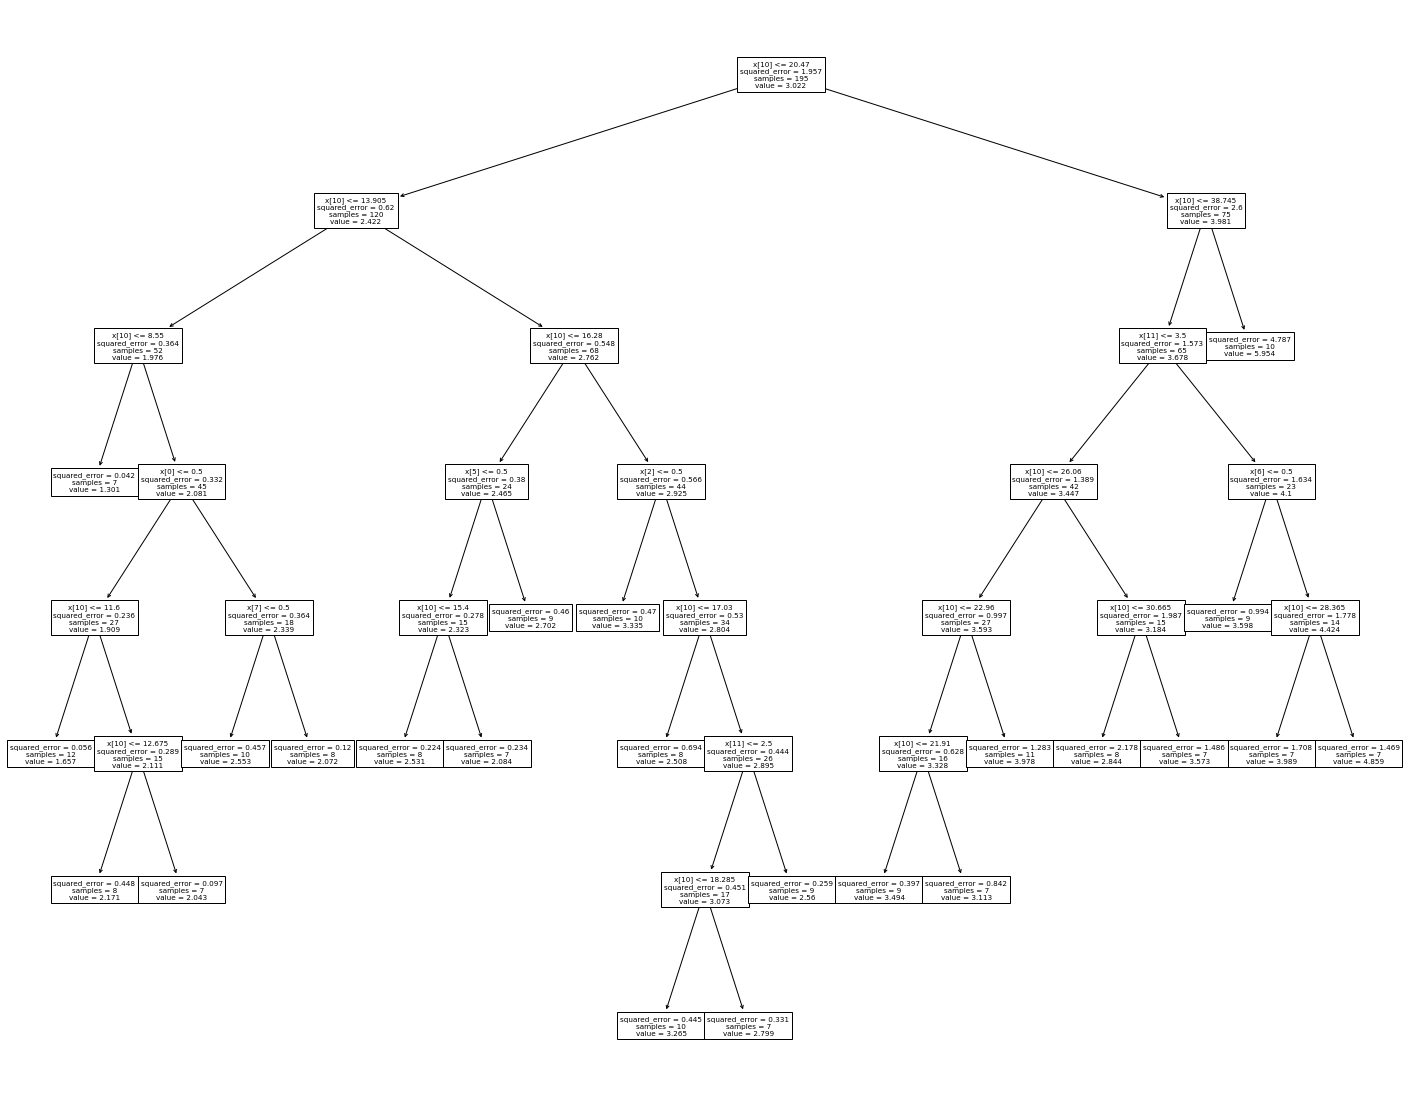

In [36]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(25,20))
tree.plot_tree(arbol_variables_OneHot_encoded)
plt.show()

#### Problemos con OrdinalEncoder 

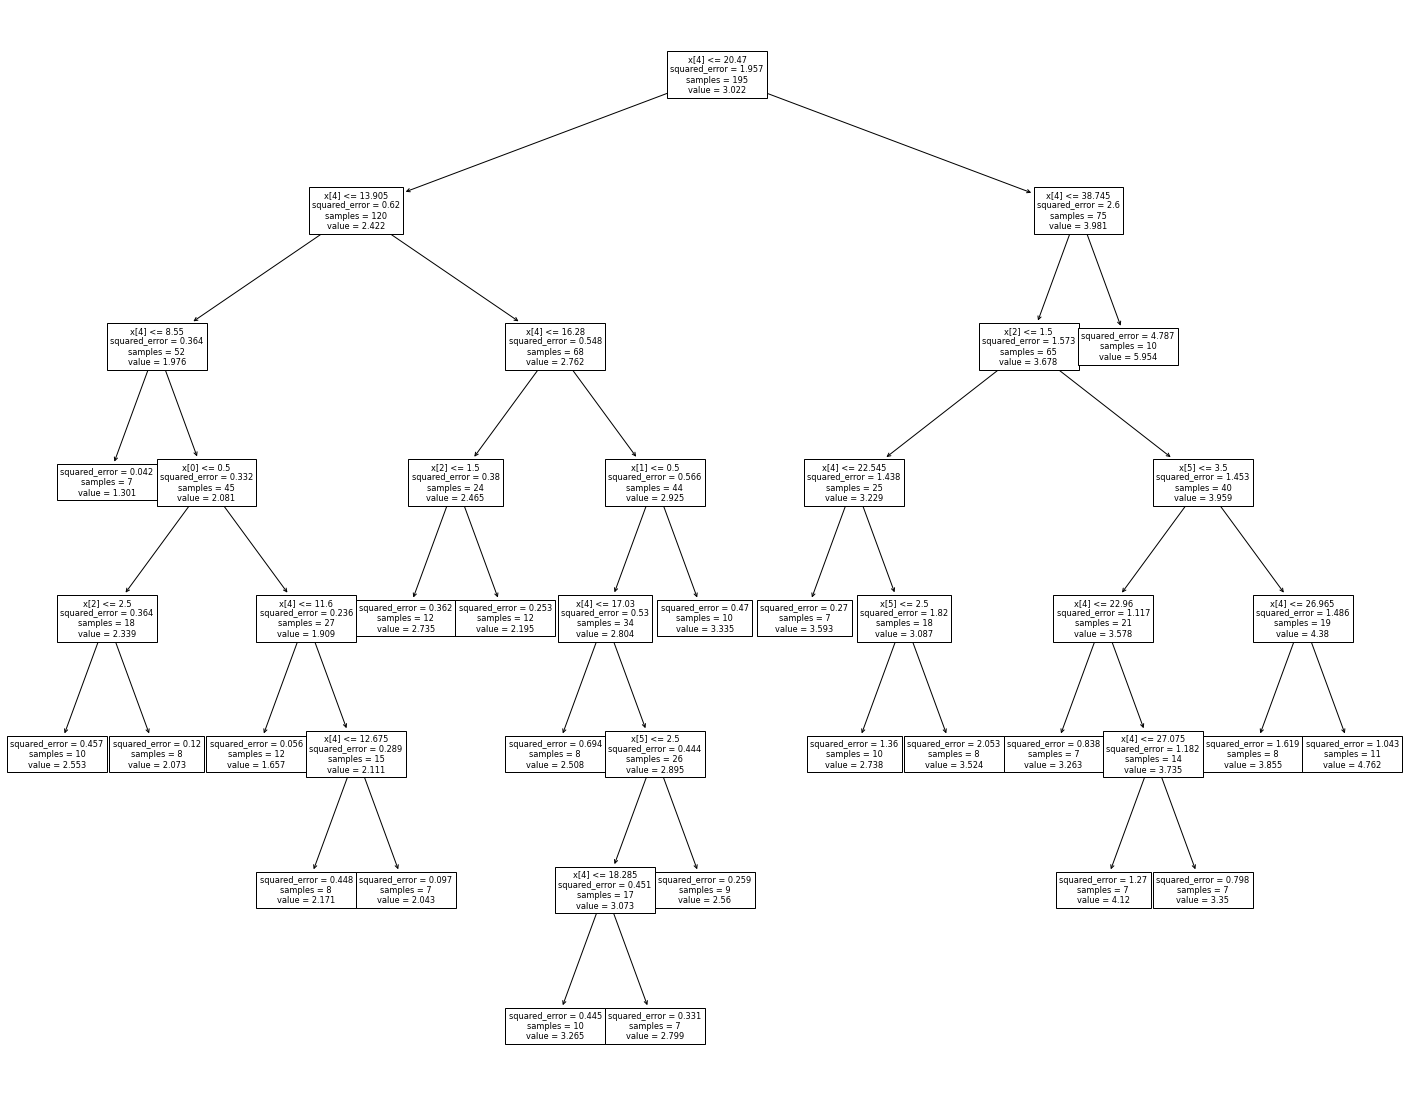

In [44]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()
X_train_ordinal_encoded = encoder.fit_transform(X_train_categoricas)
X_test_ordinal_encoded = encoder.transform(X_test_categoricas)

# Convert the encoded arrays into DataFrames
X_train_ordinal_encoded = pd.DataFrame(X_train_ordinal_encoded, columns=X_train_categoricas.columns)
X_test_ordinal_encoded = pd.DataFrame(X_test_ordinal_encoded, columns=X_test_categoricas.columns)

# Concatenate the encoded categorical variables with the continuous variables
X_train_ordinal_encoded_aplicado = pd.concat([X_train_ordinal_encoded, X_train_continuas], axis=1)
X_test_ordinal_encoded_aplicado = pd.concat([X_test_ordinal_encoded, X_test_continuas], axis=1)

# Fit the decision tree regressor model
arbol_ordinal_encoded = DecisionTreeRegressor(min_samples_leaf=7)
arbol_ordinal_encoded.fit(X_train_ordinal_encoded_aplicado, y_train)

# Make predictions on the test data
y_predH_arbol_oridnal_encoded = arbol_ordinal_encoded.predict(X_test_ordinal_encoded_aplicado)

# Plot the decision tree
plt.figure(figsize=(25, 20))
tree.plot_tree(arbol_ordinal_encoded)
plt.show()


In [45]:
X_train_ordinal_encoded_aplicado

,sex,smoker,day,time,total_bill,size
0,0.0,0.0,2.0,0.0,13.39,2
1,0.0,1.0,2.0,0.0,20.90,3
2,0.0,0.0,1.0,0.0,20.29,2
3,0.0,0.0,1.0,0.0,14.73,2
4,1.0,0.0,2.0,0.0,9.68,2
...,...,...,...,...,...,...
190,1.0,0.0,2.0,0.0,12.66,2
191,1.0,1.0,2.0,0.0,23.17,4
192,0.0,1.0,3.0,1.0,13.00,2
193,1.0,0.0,1.0,0.0,17.81,4


In [47]:
X_test_ordinal_encoded_aplicado.head()

,sex,smoker,day,time,total_bill,size
0,1.0,0.0,2.0,0.0,19.77,4
1,0.0,0.0,2.0,0.0,24.59,4
2,1.0,0.0,1.0,0.0,9.55,2
3,1.0,0.0,1.0,0.0,10.51,2
4,0.0,0.0,1.0,0.0,20.69,4


In [48]:
X_test_ordinal_encoded_aplicado.shape

(49, 6)

##### Probemos 'gradient boosting' from xgboost  (pip install xgboost)

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


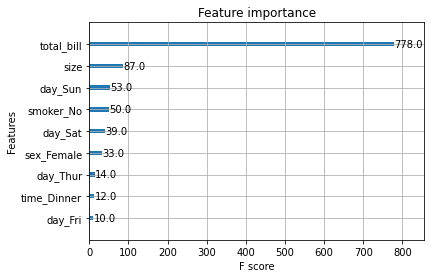

In [51]:
import xgboost as xgb

# Convert categorical variables to one-hot encoding
encoder = OneHotEncoder(sparse=False)
X_train_gboost_encoded = encoder.fit_transform(X_train_categoricas)
X_test_gboost_encoded = encoder.transform(X_test_categoricas)

# Concatenate the encoded categorical variables with the continuous variables
X_train_gboost_encoded_aplicado = pd.concat([pd.DataFrame(X_train_gboost_encoded, columns=encoder.get_feature_names_out(X_train_categoricas.columns)), X_train_continuas], axis=1)
X_test_gboost_encoded_aplicado = pd.concat([pd.DataFrame(X_test_gboost_encoded, columns=encoder.get_feature_names_out(X_test_categoricas.columns)), X_test_continuas], axis=1)

# Create and fit the gradient boosting model
xgb_model = xgb.XGBRegressor(min_child_weight=7)
xgb_model.fit(X_train_gboost_encoded_aplicado, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test_gboost_encoded_aplicado)

# Plot the feature importance
xgb.plot_importance(xgb_model)
plt.show()


#### Aplicando RandomForestRegressor para lidear de mejor manera con la combinación de variables categoricas + continuas 

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


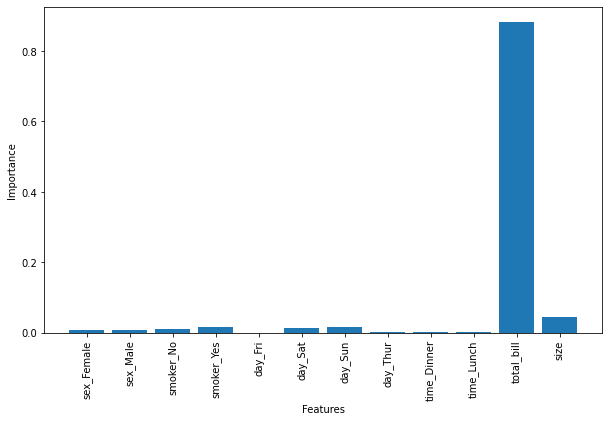

In [53]:
from sklearn.ensemble import RandomForestRegressor

# Convert categorical variables to one-hot encoding
encoder = OneHotEncoder(sparse=False)
X_train_rf_encoded = encoder.fit_transform(X_train_categoricas)
X_test_rf_encoded = encoder.transform(X_test_categoricas)

# Concatenate the encoded categorical variables with the continuous variables
X_train_rf_encoded_aplicado = pd.concat([pd.DataFrame(X_train_rf_encoded, columns=encoder.get_feature_names_out(X_train_categoricas.columns)), X_train_continuas], axis=1)
X_test_rf_encoded_aplicado = pd.concat([pd.DataFrame(X_test_rf_encoded, columns=encoder.get_feature_names_out(X_test_categoricas.columns)), X_test_continuas], axis=1)

# Create and fit the random forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, min_samples_leaf=7)
rf_model.fit(X_train_rf_encoded_aplicado, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_rf_encoded_aplicado)

# Plot feature importance
importances = rf_model.feature_importances_
feature_names = X_train_rf_encoded_aplicado.columns
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()



In [54]:
rf_model[0]

DecisionTreeRegressor(max_features=1.0, min_samples_leaf=7,
                      random_state=842871001)

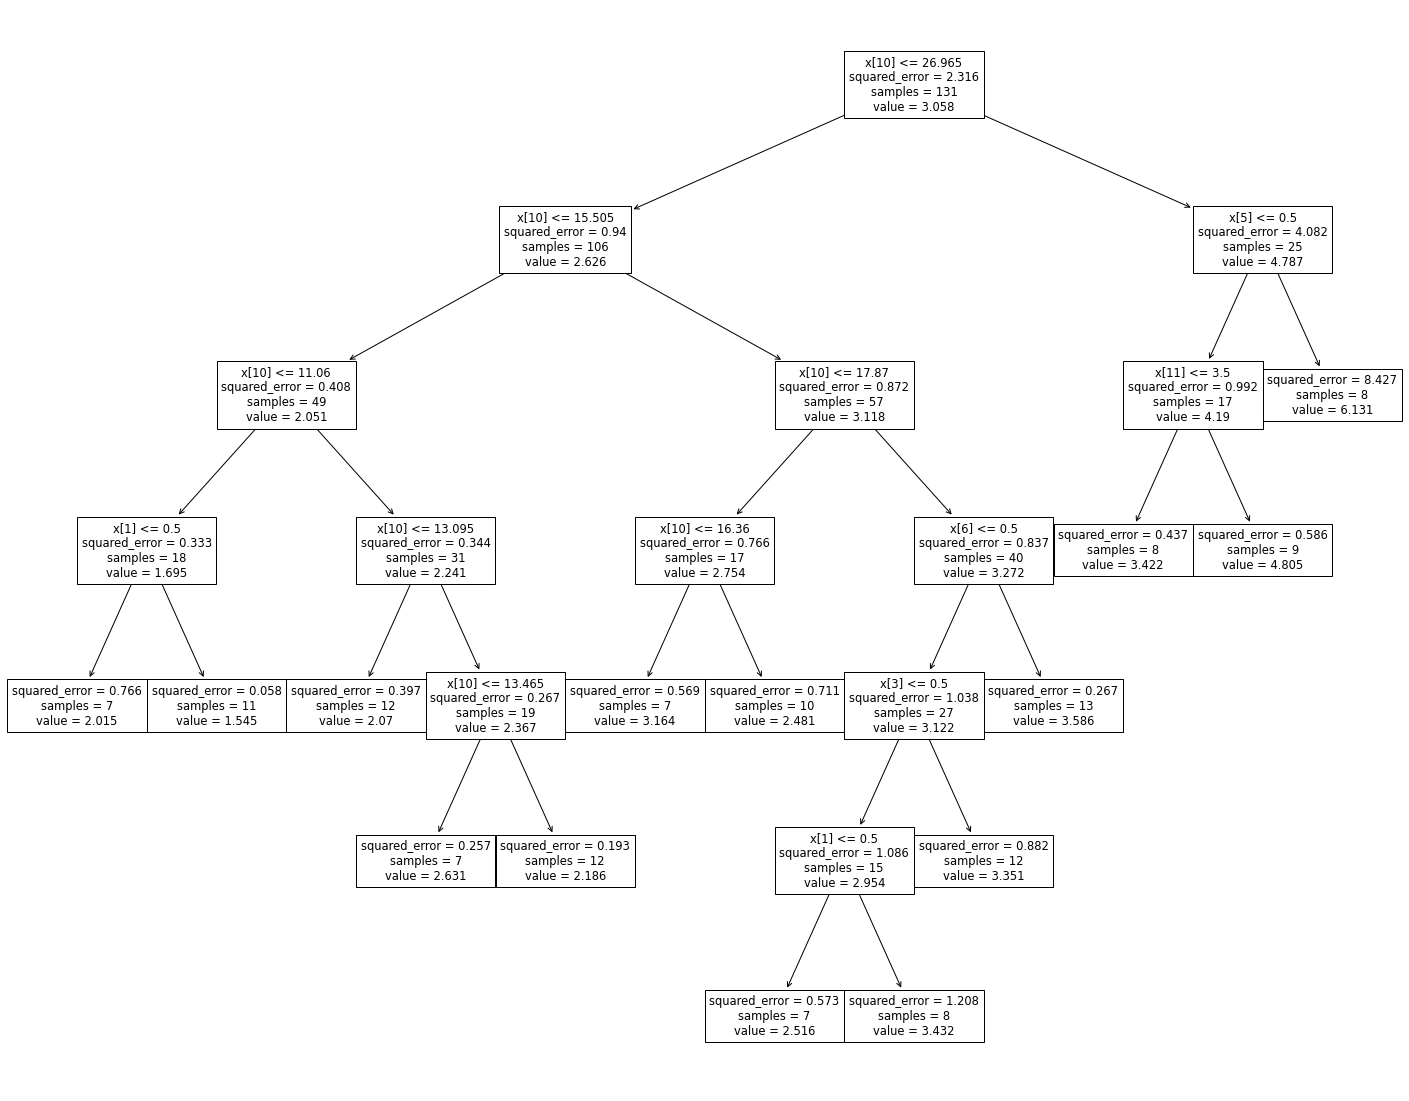

In [55]:
plt.figure(figsize=(25,20))
tree.plot_tree(rf_model[0])
plt.show()